In [1]:
import pandas as pd
import numpy as np

#畫圖套件
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head(2) 
#holiday 禮拜六禮拜天不算
#workingday 禮拜一到五
#season ---> 1 =春天，2 =夏天，3 =秋天，4 =冬天
#weather ---> 1>4 = 好>差

#          日期時間   季節      假日     工作天        天氣     溫度    體感溫度  相對溼度    風速     未註冊人數  已註冊人數  所有租車的人

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [3]:
#train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


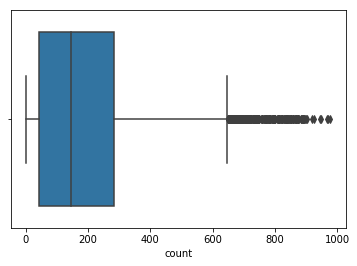

In [4]:
#觀察count

sns.boxplot(train_df['count'])
plt.show()


D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


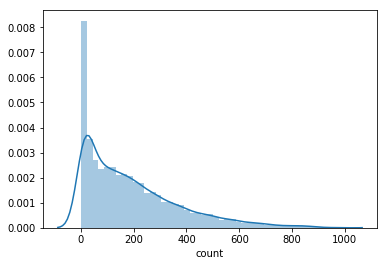

In [5]:
sns.distplot(train_df['count'])
plt.show()

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


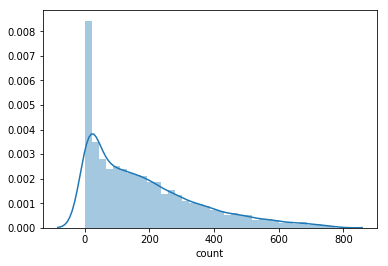

In [6]:
cnt=train_df['count'].values
q99=np.percentile(cnt,[99]) #第99百分位數

train_df=train_df[train_df['count']<q99[0]]  #去掉比第99百分位數還要大的資料
sns.distplot(train_df['count'])
plt.show()

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


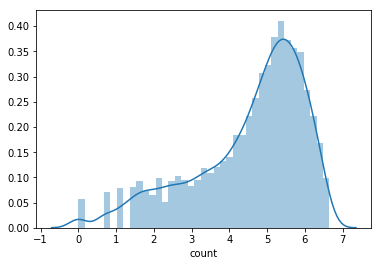

0        2.772589
1        3.688879
2        3.465736
3        2.564949
4        0.000000
5        0.000000
6        0.693147
7        1.098612
8        2.079442
9        2.639057
10       3.583519
11       4.025352
12       4.430817
13       4.543295
14       4.663439
15       4.700480
16       4.532599
17       4.204693
18       3.555348
19       3.610918
20       3.583519
21       3.526361
22       3.332205
23       3.663562
24       2.833213
25       2.833213
26       2.197225
27       1.791759
28       1.098612
29       0.693147
           ...   
10856    6.263398
10857    5.866468
10858    5.590987
10859    5.123964
10860    4.882802
10861    4.394449
10862    3.713572
10863    2.708050
10864    1.098612
10865    1.609438
10866    1.945910
10867    3.433987
10868    4.718499
10869    5.894403
10870    6.519147
10871    5.758902
10872    5.099866
10873    5.298317
10874    5.463832
10875    5.361292
10876    5.384495
10877    5.468060
10878    5.811141
10879    6.331502
10880    6

In [7]:
#讓數據變小一點
train_df['count']=train_df['count'].apply(lambda x:np.log(x)) #以e為底取log
sns.distplot(train_df['count'])
plt.show()
print (train_df['count'])

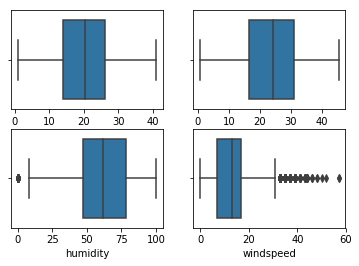

In [8]:
cont_names=['temp','atemp','humidity','windspeed']
  
i=0
for name in cont_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.boxplot(name,data=train_df) 
    
plt.show()
#temp atemp humidity分布正常 windspeed很異常

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


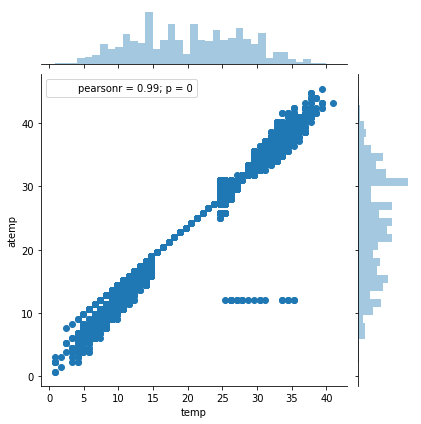

In [9]:
sns.jointplot('temp','atemp',data=train_df) 
plt.show()

D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


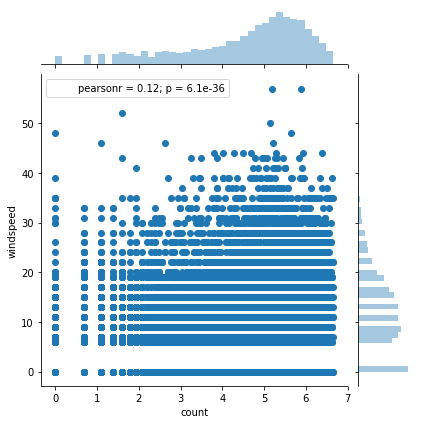

In [10]:
sns.jointplot('count','windspeed',data=train_df) 
plt.show()


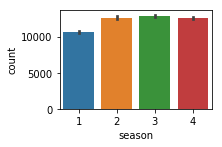

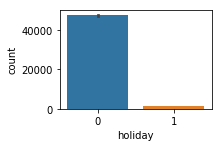

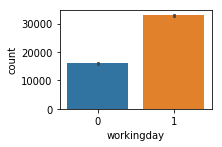

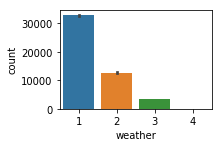

In [11]:
#租借總數

cat_names=['season', 'holiday', 'workingday', 'weather']
i=1
for name in cat_names:
    plt.subplot(2,2,i)
    sns.barplot(x=name,y='count',data=train_df,estimator=sum)
    i=i+1
    plt.show()

In [12]:
from datetime import datetime

train_df['datetime']=train_df['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
time_series_df=train_df
time_series_df.index=train_df['datetime']  #把index改成datetime來顯示


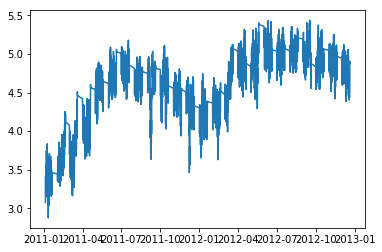

In [13]:
plt.plot(time_series_df['count'].rolling(60).mean()) #每60筆資料相加平均 方便觀察變化
plt.show()

In [14]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.772589
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.688879
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.465736
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.564949
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.000000


In [15]:
new_df=train_df

new_df['month']=new_df['datetime'].apply(lambda x:x.month)
new_df['hour']=new_df['datetime'].apply(lambda x:x.hour)
new_df['day']=new_df['datetime'].apply(lambda x:x.day)
new_df['year']=new_df['datetime'].apply(lambda x:x.year)

new_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour,day,year
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.772589,1,0,1,2011
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.688879,1,1,1,2011
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.465736,1,2,1,2011
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.564949,1,3,1,2011
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.000000,1,4,1,2011


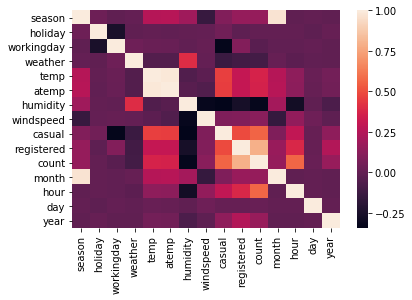

In [21]:
sns.heatmap(new_df.corr())
plt.show()

In [16]:
#temp跟atemp刪除其中一個(因為線性相關)
#風速很異常所以刪掉
final_df=new_df.drop(['datetime','temp','windspeed','casual','registered','day'], axis=1)
final_df.head()

,season,holiday,workingday,weather,atemp,humidity,count,month,hour,year
datetime,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,14.395,81,2.772589,1,0,2011
2011-01-01 01:00:00,1,0,0,1,13.635,80,3.688879,1,1,2011
2011-01-01 02:00:00,1,0,0,1,13.635,80,3.465736,1,2,2011
2011-01-01 03:00:00,1,0,0,1,14.395,75,2.564949,1,3,2011
2011-01-01 04:00:00,1,0,0,1,14.395,75,0.000000,1,4,2011


In [17]:
#get_dummies -> 進行one-hot編碼
#當離散特徵的值之間沒有大小的意義時使用

weather_df=pd.get_dummies(new_df['weather'],prefix='w',drop_first=True)
year_df=pd.get_dummies(new_df['year'],prefix='y',drop_first=True)
month_df=pd.get_dummies(new_df['month'],prefix='m',drop_first=True)
hour_df=pd.get_dummies(new_df['hour'],prefix='h',drop_first=True)
season_df=pd.get_dummies(new_df['season'],prefix='s',drop_first=True)
                     

final_df=final_df.join(weather_df)
final_df=final_df.join(year_df)
final_df=final_df.join(month_df)                     
final_df=final_df.join(hour_df)
final_df=final_df.join(season_df)
                     
final_df.head()

,season,holiday,workingday,weather,atemp,humidity,count,month,hour,year,...,h_17,h_18,h_19,h_20,h_21,h_22,h_23,s_2,s_3,s_4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,14.395,81,2.772589,1,0,2011,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 01:00:00,1,0,0,1,13.635,80,3.688879,1,1,2011,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 02:00:00,1,0,0,1,13.635,80,3.465736,1,2,2011,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 03:00:00,1,0,0,1,14.395,75,2.564949,1,3,2011,...,0,0,0,0,0,0,0,0,0,0
2011-01-01 04:00:00,1,0,0,1,14.395,75,0.000000,1,4,2011,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#.values 是用來把dataframe變成單純的array
X=final_df.drop("count",axis=1).values
Y=final_df["count"].values

In [21]:
import xgboost as xg
from sklearn.model_selection import GridSearchCV  #自動找參數用

def grid_search():
  print ('lets go')
  #xgr=xg.XGBRegressor(tree_method='gpu_hist') #要使用GPU在這裡加上tree_method='gpu_hist'
  #xgr=xg.XGBRegressor(tree_method='gpu_hist',max_depth=8,min_child_weight=8) 
  xgr=xg.XGBRegressor(tree_method='gpu_hist',max_depth=8,min_child_weight=8,gamma=0.0) 
  xgr.fit(X,Y)
  
  #parameters=[{'max_depth':[8,9,10,11,12],'min_child_weight':[4,5,6,7,8]}] #step1 結果為8 8
  #parameters=[{'gamma':[i/10.0 for i in range(0,5)]}]  #step2  結果為0.0
  parameters=[{'subsample':[i/10.0 for i in range(6,10)],  #step3
               'colsample_bytree':[i/10.0 for i in range(6,10)]}]
  grid_search= GridSearchCV(estimator=xgr, param_grid=parameters, cv=10,n_jobs=-1)
  
  print (1)
  grid_search=grid_search.fit(X,Y)
  print (2)
  best_accuracy=grid_search.best_score_
  best_parameters=grid_search.best_params_
  print (best_accuracy)
  print (best_parameters)
  
if __name__ == '__main__':
  grid_search()

#step3結果如下
#0.9249707907734518
#{'colsample_bytree': 0.6, 'subsample': 0.9}

lets go
1
2
0.9249707907734518
{'colsample_bytree': 0.6, 'subsample': 0.9}


In [60]:
#使用剛剛調好的參數再訓練一次
import xgboost as xg
xgr=xg.XGBRegressor(tree_method='gpu_hist',max_depth=8,min_child_weight=8,gamma=0.0,colsample_bytree=0.6,subsample=0.9)
xgr.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0.0, learning_rate=0.1,
       max_delta_step=0, max_depth=8, min_child_weight=8, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.9, tree_method='gpu_hist')

In [52]:
#處理test資料
new_df=test_df
new_df['datetime']=new_df['datetime'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

new_df['month']=new_df['datetime'].apply(lambda x:x.month)
new_df['hour']=new_df['datetime'].apply(lambda x:x.hour)
new_df['day']=new_df['datetime'].apply(lambda x:x.day)
new_df['year']=new_df['datetime'].apply(lambda x:x.year)

new_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,hour,day,year
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,20,2011
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,1,20,2011
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,2,20,2011
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,3,20,2011
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,4,20,2011


In [53]:
new_df=new_df.drop(['datetime','temp','windspeed','day'], axis=1)
new_df.head()

,season,holiday,workingday,weather,atemp,humidity,month,hour,year
0,1,0,1,1,11.365,56,1,0,2011
1,1,0,1,1,13.635,56,1,1,2011
2,1,0,1,1,13.635,56,1,2,2011
3,1,0,1,1,12.880,56,1,3,2011
4,1,0,1,1,12.880,56,1,4,2011


In [54]:
weather_df=pd.get_dummies(new_df['weather'],prefix='w',drop_first=True)
yr_df=pd.get_dummies(new_df['year'],prefix='y',drop_first=True)
month_df=pd.get_dummies(new_df['month'],prefix='m',drop_first=True)
hour_df=pd.get_dummies(new_df['hour'],prefix='h',drop_first=True)
season_df=pd.get_dummies(new_df['season'],prefix='s',drop_first=True)


new_df=new_df.join(weather_df)
new_df=new_df.join(yr_df)
new_df=new_df.join(month_df)                     
new_df=new_df.join(hour_df)
new_df=new_df.join(season_df)
                     
new_df.head()

,season,holiday,workingday,weather,atemp,humidity,month,hour,year,w_2,...,h_17,h_18,h_19,h_20,h_21,h_22,h_23,s_2,s_3,s_4
0,1,0,1,1,11.365,56,1,0,2011,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,13.635,56,1,1,2011,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,13.635,56,1,2,2011,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,12.880,56,1,3,2011,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,12.880,56,1,4,2011,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
X_test=new_df.values
y_output=xgr.predict(X_test)

#儲存資料
op=pd.DataFrame({'datetime':test_df['datetime'],
                 'count':np.exp(y_output)})
op.to_csv('sub2.csv',index=False)

In [57]:
#另一個算法
train_X=final_df.drop("count",axis=1).astype('int')
train_Y=final_df["count"].astype('int')
test_2=new_df.astype('int')

from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(train_X,train_Y) 

Y_pred_nbc = lgr.predict(test_2)  
acc_lgr = lgr.score(train_X,train_Y)
print(acc_lgr)

0.5803099192725248
